# End-user generated time series analysis using Zarr data in xarray

This notebook describes the python-based Zarr time series approach as part of the TRT-43 time series technology study. This notebook was adapted from the [Pangeo AGU Ocean Sciences 2020 tutorial](https://github.com/pangeo-gallery/osm2020tutorial) with credits below:

### Credits: Tutorial development
Dr. Chelle Gentemann - Twitter - Farallon Institute

Lucas Sterzinger - Twitter - University of California, Davis
  
### Compute Resources
This notebook was developed and run using an AWS m5.2xlarge instance as this is what was utilized in the Pangeo workshop via their OHW JupyterHub. This has 8 vCPU and 32 GB memory. 

# Dataset used: Multi-Scale Ultra High Resolution (MUR) Sea Surface Temperature (SST)

Found from the AWS Open Registry:

- Click here: [AWS Public Dataset](https://aws.amazon.com/opendata/)
- Click on `Find public available data on AWS` button
- Search for MUR
- Select [MUR SST](https://registry.opendata.aws/mur/)

 
 
 
 

-------------------------------------------------------

![](./awsmur.png)



## [MUR SST](https://podaac.jpl.nasa.gov/Multi-scale_Ultra-high_Resolution_MUR-SST) [AWS Public dataset program](https://registry.opendata.aws/mur/) 

### Access the MUR SST Zarr store which is in an s3 bucket.  

![image](https://podaac.jpl.nasa.gov/Podaac/thumbnails/MUR-JPL-L4-GLOB-v4.1.jpg)

We will start with my favorite Analysis Ready Data (ARD) format: [Zarr](https://zarr.readthedocs.io/en/stable/).  Using data stored in Zarr is fast, simple, and contains all the metadata normally in a netcdf file, so you can figure out easily what is in the datastore.  

- Fast - Zarr is fast because all the metadata is consolidated into a .json file.  Reading in massive datasets is lightning fast because it only reads the metadata and does read in data until it needs it for compute.

- Simple - Filenames?  Who needs them? Who cares?  Not I.  Simply point your read routine to the data directory.

- Metadata - all you want!

## Import Libraries

You may need to pip install these libraries depending on your python environment

In [2]:
pip install xarray[complete]
pip install s3fs
pip install dask

Note: you may need to restart the kernel to use updated packages.


In [1]:
# filter some warning messages
import warnings 
warnings.filterwarnings("ignore") 

#libraries
import datetime as dt
import xarray as xr
import fsspec
import s3fs
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# make datasets display nicely
xr.set_options(display_style="html")  

import dask
from dask.distributed import performance_report, Client, progress

#magic fncts #put static images of your plot embedded in the notebook
%matplotlib inline  
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina' 


[fsspec.get_mapper](https://filesystem-spec.readthedocs.io/en/latest/api.html?highlight=get_mapper#fsspec.get_mapper) Creates a mapping between your computer and the s3 bucket.  This isn't necessary if the Zarr file is stored locally.

[xr.open_zarr](http://xarray.pydata.org/en/stable/generated/xarray.open_zarr.html) Reads a Zarr store into an Xarray dataset


## Open zarr dataset

In [2]:
%%time
file_location = 's3://mur-sst/zarr'

ikey = fsspec.get_mapper(file_location, anon=True)

ds_sst = xr.open_zarr(ikey,consolidated=True)

ds_sst

CPU times: user 2.7 s, sys: 109 ms, total: 2.81 s
Wall time: 3.67 s


,Array,Chunk
Bytes,15.19 TiB,245.78 MiB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,15.19 TiB,245.78 MiB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


## Testing scenarios

Based on https://wiki.earthdata.nasa.gov/display/TRT/Test+Scenarios

Spatial Constraints:



Single grid cell	(-129.995, 39.995, -129.995, 39.995)	/analysed_sst[][5000][5000];/time;/lat[5000];/lon[5000]	(-129.95, 39.95, -129.95, 39.95)	
10x10 grid cells	(-129.995, 39.995, -129.905, 39.905)	/analysed_sst[][5000:5009][5000:5009];/time;/lat[5000:5009];/lon[5000:5009]	(-129.95, 39.95, -129.86, 39.86)	
3x3 grid cells	(-129.995, 39.995, -129.975, 39.975)	/analysed_sst[][5000:5002][5000:5002];/time;/lat[5000:5002];/lon[5000:5002]	(-129.95, 39.95, -129.93, 39.93)	

### Read entire 10 years of data at 1 point.

Select the ``analysed_sst`` variable over a specific time period, `lat`, and `lon` and load the data into memory.  This is small enough to load into memory which will make calculating climatologies easier in the next step.

CPU times: user 273 ms, sys: 177 ms, total: 450 ms
Wall time: 3.16 s


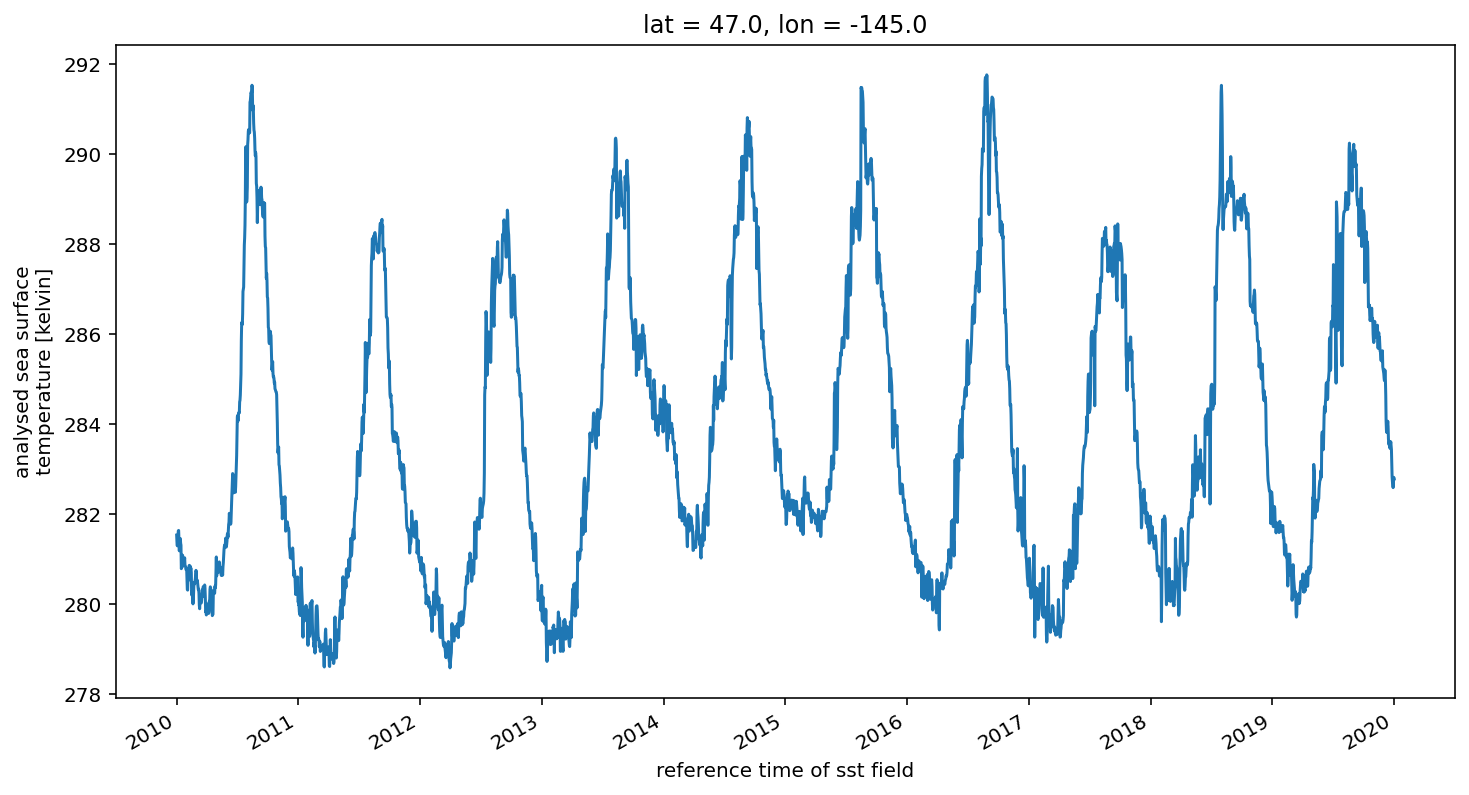

In [3]:
%%time

sst_timeseries = ds_sst['analysed_sst'].sel(time = slice('2010-01-01','2020-01-01'),
                                            lat  = 47,
                                            lon  = -145
                                           ).load()

sst_timeseries.plot()

### The anomaly is more interesting...  

Use [.groupby](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.groupby.html#xarray-dataarray-groupby) method to calculate the climatology and [.resample](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.resample.html#xarray-dataset-resample) method to then average it into 1-month bins.
- [DataArray.mean](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.mean.html#xarray-dataarray-mean) arguments are important! Xarray uses metadata to plot, so keep_attrs is a nice feature.  Also, for SST there are regions with changing sea ice.  Setting skipna = False removes these regions. 

CPU times: user 426 ms, sys: 154 µs, total: 426 ms
Wall time: 425 ms


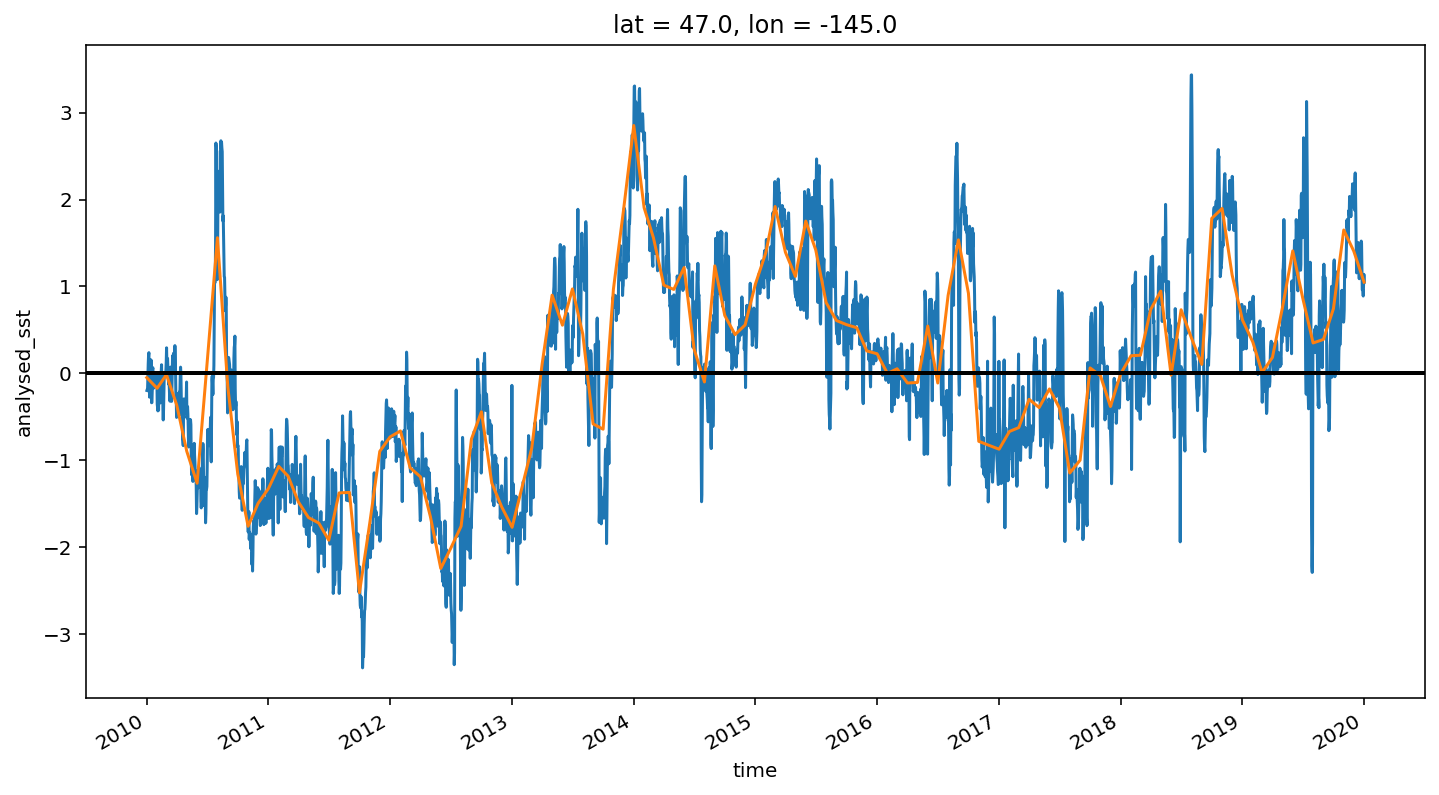

In [4]:
%%time

sst_climatology = sst_timeseries.groupby('time.dayofyear').mean('time',keep_attrs=True,skipna=False)

sst_anomaly = sst_timeseries.groupby('time.dayofyear')-sst_climatology

sst_anomaly_monthly = sst_anomaly.resample(time='1MS').mean(keep_attrs=True,skipna=False)

#plot the data
sst_anomaly.plot()
sst_anomaly_monthly.plot()
plt.axhline(linewidth=2,color='k')

# Chukchi Sea SST timeseries

# Note SST is set to -1.8 C (271.35 K) when ice is present

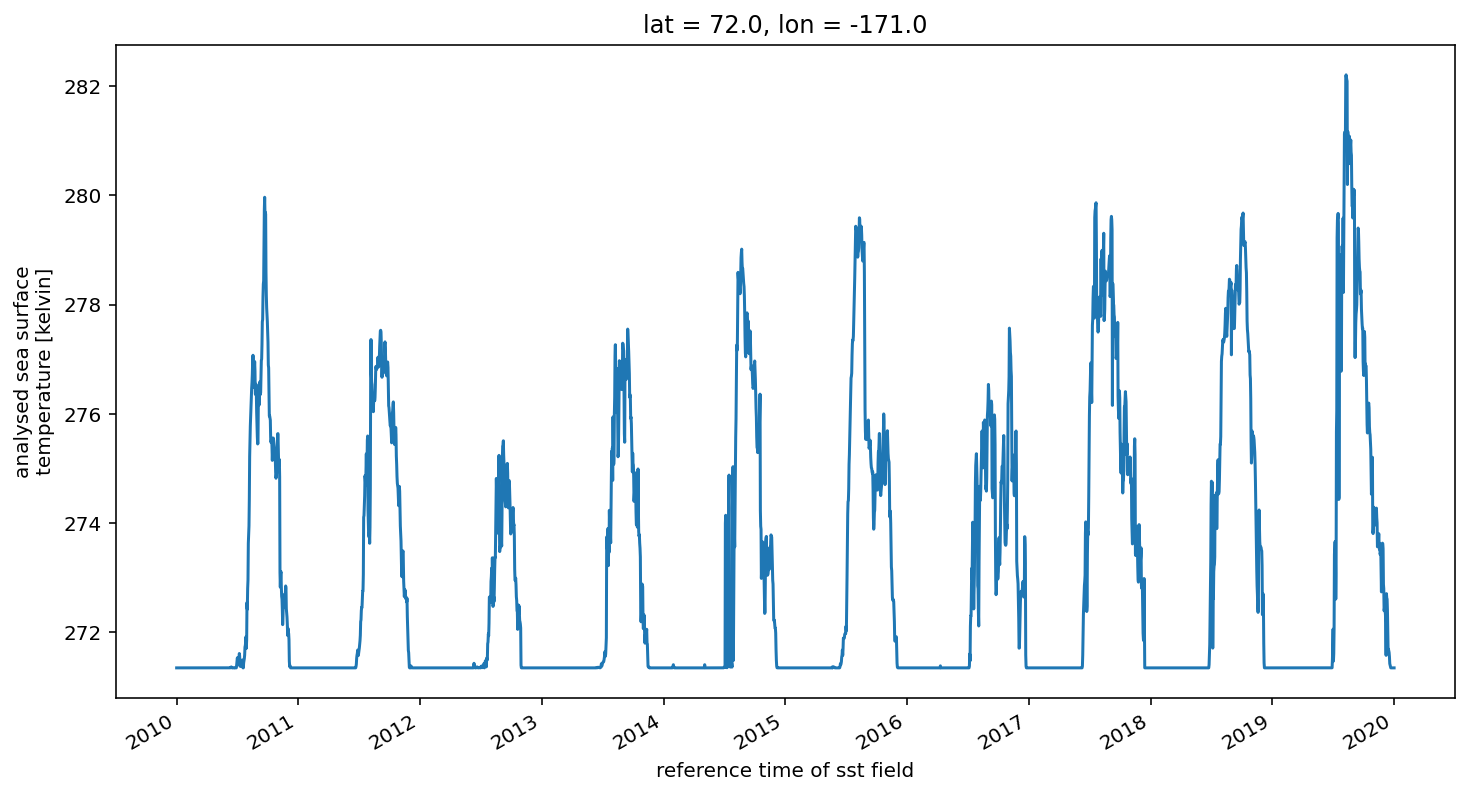

In [5]:
sst_timeseries = ds_sst['analysed_sst'].sel(time = slice('2010-01-01','2020-01-01'),
                                            lat  = 72,
                                            lon  = -171
                                           ).load()

sst_timeseries.plot()

# Grid resolution does NOT equal spatial resolution

- many L4 SST analyses blend infrared (~ 1 - 4 km data) with passive microwave (~ 50 km) data.  Data availability will determine regional / temporal changes in spatial resolution

- many L4 SST analyses apply smoothing filters that may further reduce resolution

CPU times: user 8.72 s, sys: 6.15 s, total: 14.9 s
Wall time: 12.9 s


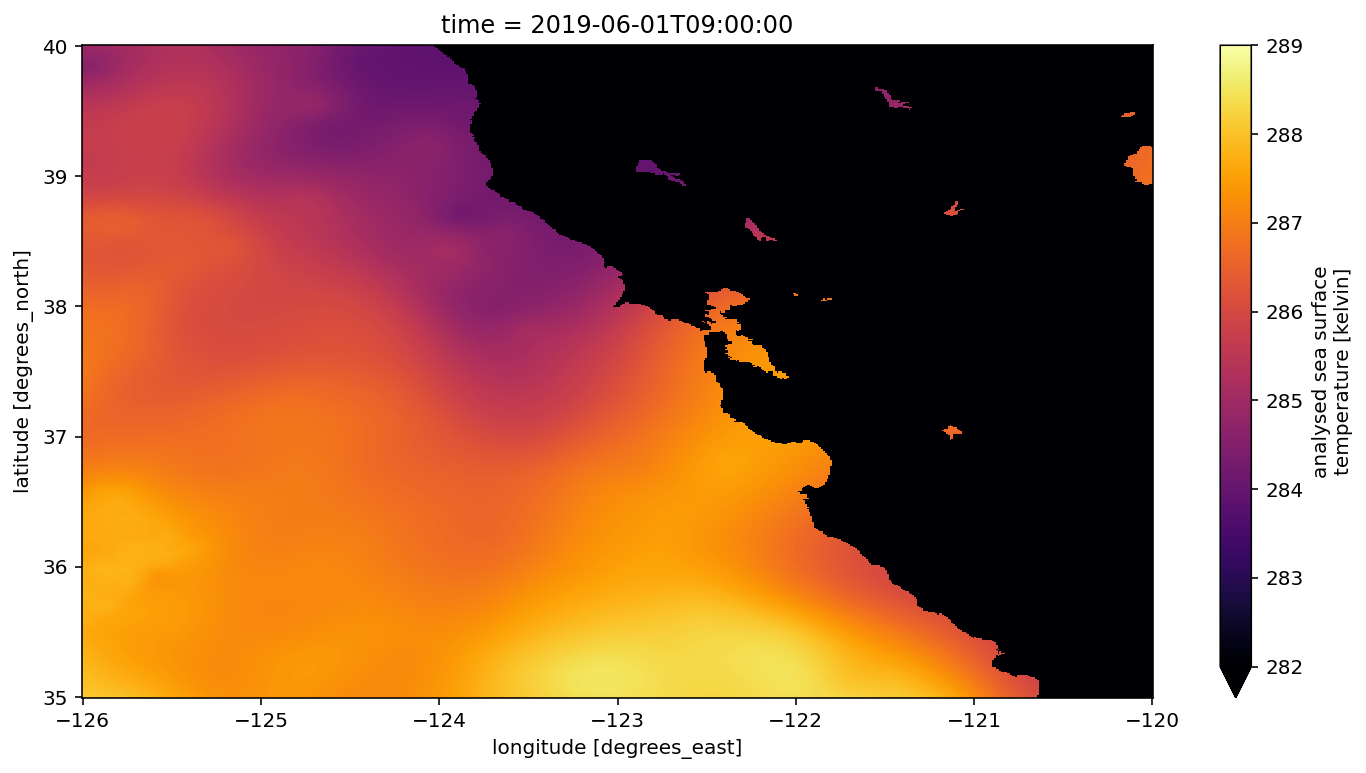

In [6]:
%%time

subset = ds_sst['analysed_sst'].sel(time='2019-06-01',lat=slice(35,40),lon=slice(-126,-120))

subset.plot(vmin=282,vmax=289,cmap='inferno')

CPU times: user 8.43 s, sys: 5.58 s, total: 14 s
Wall time: 8.7 s


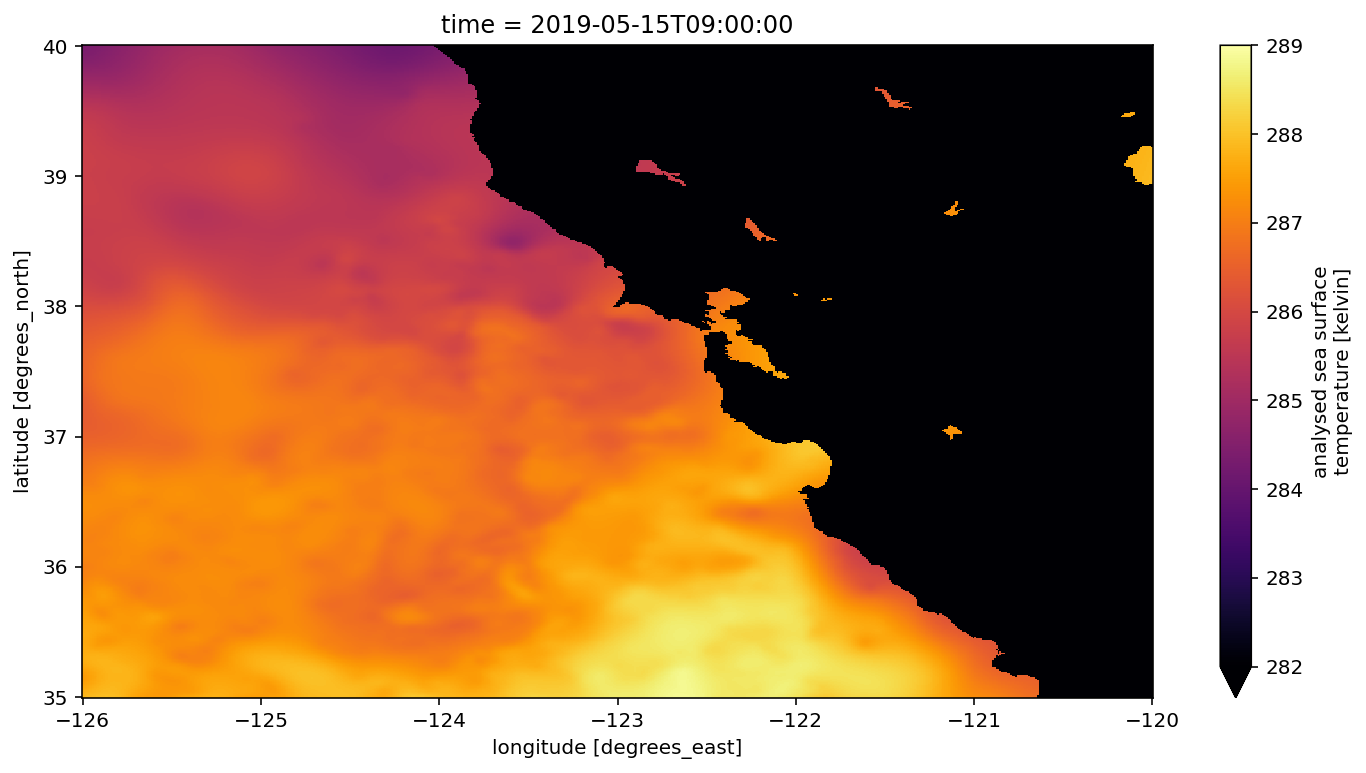

In [7]:
%%time

subset = ds_sst['analysed_sst'].sel(time='2019-05-15',lat=slice(35,40),lon=slice(-126,-120))

subset.plot(vmin=282,vmax=289,cmap='inferno')